In [ ]:
 import pandas as pd
 url = "https://raw.githubusercontent.com/Estadistica2025B/Estadistica2025B/refs/heads/main/Student_Performance_new.csv"
 df = pd.read_csv(url)
 df = df.dropna()
 df

,Unnamed: 0,etnia,nivel_educativo_de_los_padres,tipo_de_comida,curso_de_preparación_para_el_examen,porcentaje_de_matematicas,porcentaje_de_lectura,porcentaje_de_escritura,sexo
0,0,group_B,licenciatura,estandar,nada,0.72,0.72,0.74,mujer
1,1,group_C,algo_de_universidad,estandar,completado,0.69,0.90,0.88,mujer
2,2,group_B,maestria,estandar,nada,0.90,0.95,0.93,mujer
3,3,group_A,tecnico_asociado,subsidiado,nada,0.47,0.57,0.44,hombre
4,4,group_C,algo_de_universidad,estandar,nada,0.76,0.78,0.75,hombre
...,...,...,...,...,...,...,...,...,...
995,995,group_E,maestria,estandar,completado,0.88,0.99,0.95,mujer
996,996,group_C,preparatoria,subsidiado,nada,0.62,0.55,0.55,hombre
997,997,group_C,preparatoria,subsidiado,completado,0.59,0.71,0.65,mujer
998,998,group_D,algo_de_universidad,estandar,completado,0.68,0.78,0.77,mujer


In [ ]:
import pandas as pd


# Cargar el archivo
df = pd.read_csv("https://raw.githubusercontent.com/Estadistica2025B/Estadistica2025B/refs/heads/main/Student_Performance_new.csv")

# Ver nombres de columnas
print(df.columns)

# Definir columnas (cambia por los nombres reales)
columnas = ["porcentaje_de_matematicas", "porcentaje_de_lectura", "porcentaje_de_escritura"]

# Crear la columna "Promedio"
df["Promedio"] = df[columnas].mean(axis=1)

# Mostrar los primeros resultados
df[["porcentaje_de_matematicas", "porcentaje_de_lectura", "porcentaje_de_escritura", "Promedio"]].head()

Index(['Unnamed: 0', 'etnia', 'nivel_educativo_de_los_padres',
       'tipo_de_comida', 'curso_de_preparación_para_el_examen',
       'porcentaje_de_matematicas', 'porcentaje_de_lectura',
       'porcentaje_de_escritura', 'sexo'],
      dtype='object')


,porcentaje_de_matematicas,porcentaje_de_lectura,porcentaje_de_escritura,Promedio
0,0.72,0.72,0.74,0.726667
1,0.69,0.90,0.88,0.823333
2,0.90,0.95,0.93,0.926667
3,0.47,0.57,0.44,0.493333
4,0.76,0.78,0.75,0.763333


In [ ]:
promedio_general = df["Promedio"].mean()
print("Promedio general:", promedio_general)

Promedio general: 0.6777066666666667


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'Promedio ~ C(etnia) + C(nivel_educativo_de_los_padres) + C(tipo_de_comida) + C(curso_de_preparación_para_el_examen) + C(sexo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(etnia),0.447640,4.0,7.178378,1.068023e-05
C(nivel_educativo_de_los_padres),0.850560,5.0,10.911694,3.082815e-10
C(tipo_de_comida),1.753323,1.0,112.465474,5.866484e-25
C(curso_de_preparación_para_el_examen),1.319757,1.0,84.654713,2.062189e-19
C(sexo),0.341715,1.0,21.919017,3.241173e-06
Residual,15.387210,987.0,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_A group_B   0.0248 0.6447 -0.0245  0.074  False
group_A group_C   0.0414 0.1006 -0.0046 0.0874  False
group_A group_D   0.0619 0.0031  0.0148 0.1089   True
group_A group_E   0.0976    0.0  0.0456 0.1496   True
group_B group_C   0.0166 0.6953 -0.0185 0.0518  False
group_B group_D   0.0371 0.0445  0.0006 0.0736   True
group_B group_E   0.0728    0.0  0.0301 0.1155   True
group_C group_D   0.0205 0.4036 -0.0115 0.0524  False
group_C group_E   0.0562 0.0008  0.0173 0.0951   True
group_D group_E   0.0357 0.1076 -0.0044 0.0759  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

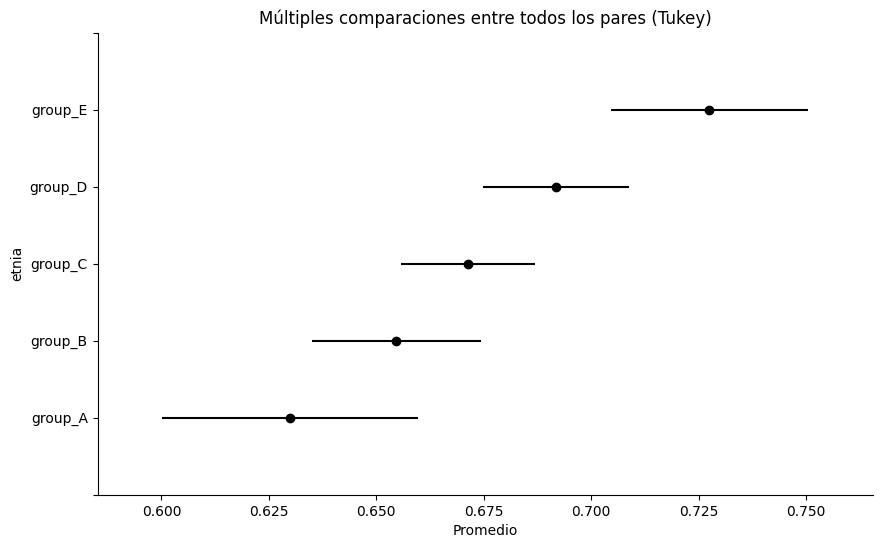

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Promedio'], groups=df['etnia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="etnia", xlabel="Promedio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(etnia)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.022


**Etnia**

La variable etnia mostró diferencias estadísticamente significativas en el ANOVA, y la prueba de Tukey confirmó que varios grupos difieren entre sí, especialmente aquellos con mayores distancias en sus medias, como los grupos A, D y E. Sin embargo, el tamaño del efecto obtenido (η² = 0.022) indica que, aunque las diferencias existen, su impacto real sobre el promedio académico es pequeño. Esto implica que la etnia no es un factor determinante en el rendimiento, aun si ciertos grupos presentan variaciones notablemente distintas.

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------------
algo_de_preparatoria algo_de_universidad   0.0337 0.1509 -0.0061 0.0735  False
algo_de_preparatoria        licenciatura   0.0682 0.0006   0.021 0.1153   True
algo_de_preparatoria            maestria   0.0849 0.0007  0.0252 0.1446   True
algo_de_preparatoria        preparatoria  -0.0201 0.7288 -0.0612  0.021  False
algo_de_preparatoria    tecnico_asociado   0.0446 0.0183  0.0047 0.0845   True
 algo_de_universidad        licenciatura   0.0345 0.2479 -0.0107 0.0796  False
 algo_de_universidad            maestria   0.0512 0.1201 -0.0069 0.1093  False
 algo_de_universidad        preparatoria  -0.0538 0.0011 -0.0926 -0.015   True
 algo_de_universidad    tecnico_asociado   0.0109 0.9618 -0.0266 0.0485  False
        licenciatura            maestria   0.0168 0.

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

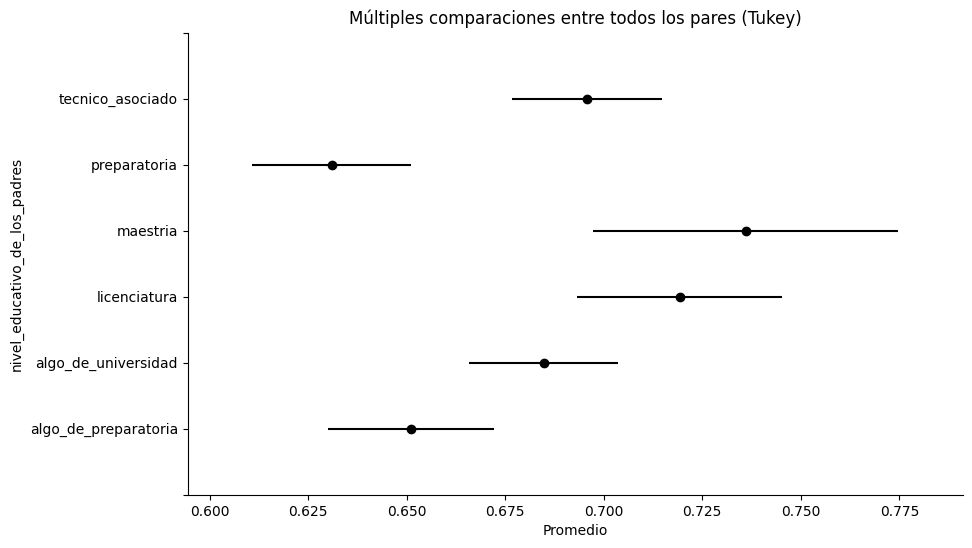

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Promedio'], groups=df['nivel_educativo_de_los_padres'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="nivel_educativo_de_los_padres", xlabel="Promedio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(nivel_educativo_de_los_padres)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.042


**Nivel educativo de los padres**

El nivel educativo de los padres también resultó significativo en el ANOVA, y Tukey mostró múltiples diferencias entre categorías, particularmente entre estudiantes cuyos padres tienen niveles educativos más bajos comparados con aquellos con licenciatura o maestría. Aun así, el tamaño del efecto (η² = 0.042) revela que esta variable tiene un impacto pequeño-moderado. Esto sugiere que, si bien el nivel educativo de los padres guarda cierta relación con el desempeño académico, su influencia no es lo suficientemente fuerte como para explicar gran parte de la variación observada.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
estandar subsidiado  -0.0864   0.0 -0.1041 -0.0687   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

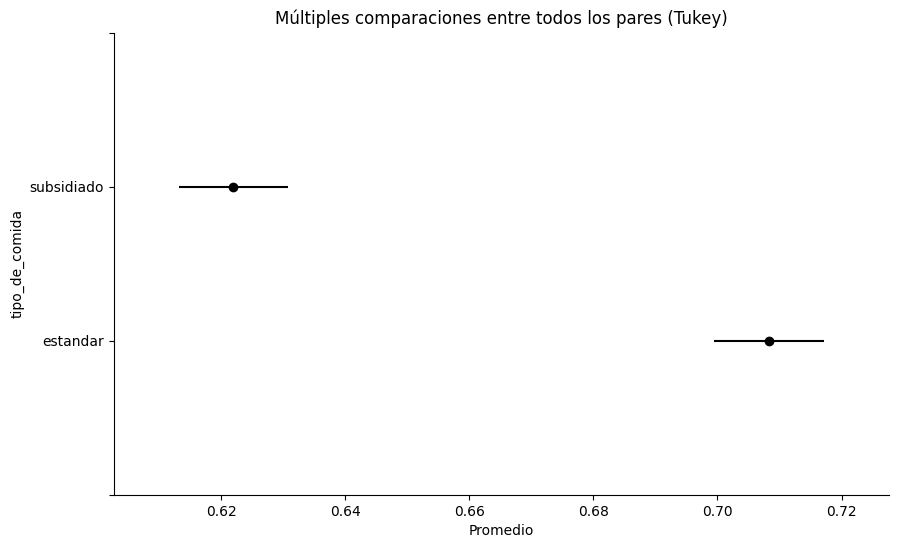

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Promedio'], groups=df['tipo_de_comida'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tipo_de_comida", xlabel="Promedio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tipo_de_comida)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.087


**Tipo de comida**

La variable tipo de comida fue una de las más destacadas. El ANOVA mostró una significancia muy alta, y Tukey confirmó que la diferencia entre quienes reciben comida estándar y quienes reciben comida subsidiada es estadísticamente significativa. El tamaño del efecto (η² = 0.087) fue de los más elevados dentro del modelo, ubicándose en un nivel mediano. Esto indica que el tipo de comida escolar tiene una influencia relevante en el promedio académico, sugiriendo que factores nutricionales o socioeconómicos relacionados podrían estar influyendo en los resultados.

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
completado   nada  -0.0763   0.0 -0.0942 -0.0585   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

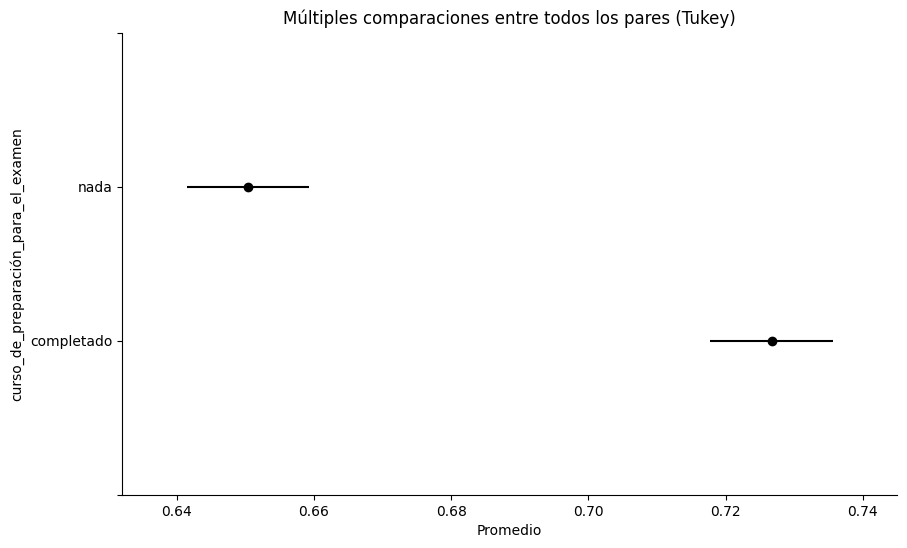

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Promedio'], groups=df['curso_de_preparación_para_el_examen'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="curso_de_preparación_para_el_examen", xlabel="Promedio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(curso_de_preparación_para_el_examen)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.066


**Curso de preparación para el examen**

El curso de preparación para el examen también presentó diferencias claras y significativas. Según Tukey, existe una diferencia importante entre quienes completaron el curso y quienes no lo hicieron. El tamaño del efecto (η² = 0.066) es mediano, lo cual demuestra que esta variable contribuye de manera considerable al rendimiento académico. Esto respalda la importancia de las intervenciones educativas estructuradas, ya que los estudiantes que complementan su formación con cursos de preparación tienden a obtener mejores promedios.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
hombre  mujer   0.0373   0.0 0.0198 0.0549   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

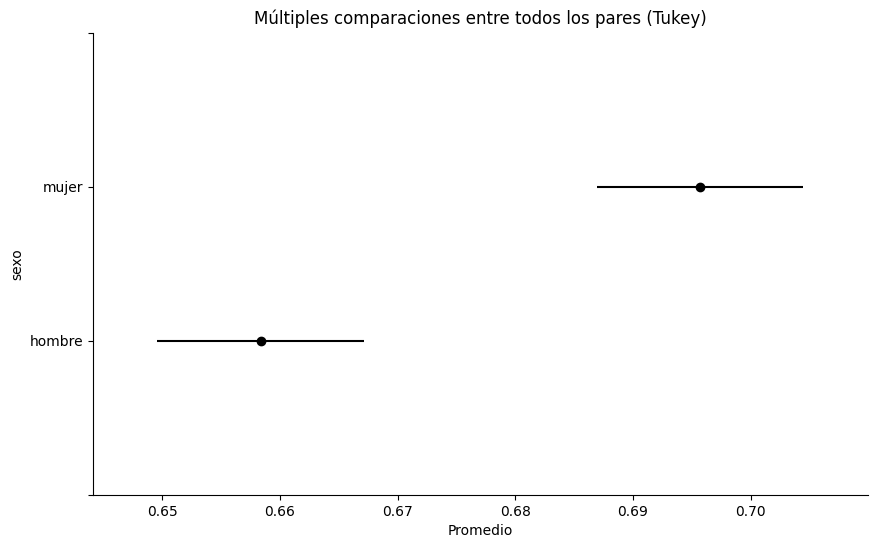

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Promedio'], groups=df['sexo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="sexo", xlabel="Promedio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(sexo)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.017


**Sexo**

Por último, la variable sexo mostró una diferencia significativa entre hombres y mujeres, según el ANOVA y la prueba de Tukey. No obstante, el tamaño del efecto (η² = 0.017) indica que la magnitud de esta diferencia es muy pequeña. Aunque existe una ligera ventaja promedio para uno de los grupos, esta variación no representa un impacto sustancial en el desempeño académico general, por lo que el sexo no debe considerarse un factor influyente importante.